#**Objetivo:** 

 


Objetivo:
En la validación Cruzada aplicamos los métodos: Cross-validation (validación cruzada), LeaveOneOut (dejar uno fuera), K-Fold para el modelo de Random Forest.


Descripción del data Set 

La adquisición de datos corresponden a 5 campañas de encuestas promocionales.

Descripción:

* Year_Birth Año de Nacimiento
* Education Educación
* Marital_Status Estado Civil
* Income Ingresos
* Kidhome número de niños pequeños en casa del cliente.
* Teenhome número de adolescentes en casa del cliente
* Dt_Customer fecha en la que el cliente se registró al CRM de la compañía.
* Recency número de días que pasaron desde la última compra.
* MntWines cantidad gastada en vinos en los últimos dos años.
* MntFruits cantidad gastada en frutas en los últimos dos años.
* MntMeatProducts cantidad gastada en carne en los últimos dos años.
* MntFishProducts cantidad gastada en pescado en los últimos dos años.
* MntSweetProducts cantidad gastada en dulces en los últimos dos años.
* MntGoldProds cantidad gastada en productos de oro en los últimos dos años.
* NumDealsPurchases número de compras realizadas con descuentos.
* NumWebPurchases número de compras realizadas en el sitio web.
* NumCatalogPurchases numero de compras realizadas usando el catálogo.
* NumStorePurchases número de compras realizadas diractamente en tiendas
* NumWebVisitsMonth número de visitas realizadas al sitio web.
* AcceptedCmp3 1 si el cliente participó en la campaña 3 promocional.
* AcceptedCmp4 1 si el cliente participó en la campaña 4 promocional.
* AcceptedCmp5 1 si el cliente participó en la campaña 5 promocional.
* AcceptedCmp1 1 si el cliente participó en la campaña 1 promocional.
* AcceptedCmp2 1 si el cliente participó en la campaña 2 promocional.
Complain 1 si el cliente ha presentado alguna queja en los últimos dos años.
* Z_CostContact Costo Contacto
* Z_Revenue Ingresos
* Response

## Librerias:

In [65]:
#importamos las librerias necearias para esta etapa
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy 
import matplotlib.pyplot       as plt
import matplotlib.pyplot       as plot


import numpy as np
%matplotlib inline
from google.colab import drive
import os
from datetime import date



In [66]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
#install library
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
#leer CSV dentro de un DataFrame
df=pd.read_csv('marketing_campaignLIMPIO.csv', sep=',')

In [69]:
#numero de filas y columnas 
df.shape

(2228, 31)

In [70]:
#informacion del data set, nulos y tipos de datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2228 non-null   int64  
 1   Year_Birth           2228 non-null   int64  
 2   Education            2228 non-null   object 
 3   Marital_Status       2228 non-null   object 
 4   Income               2228 non-null   float64
 5   Kidhome              2228 non-null   int64  
 6   Teenhome             2228 non-null   int64  
 7   Dt_Customer          2228 non-null   object 
 8   Recency              2228 non-null   int64  
 9   MntWines             2228 non-null   int64  
 10  MntFruits            2228 non-null   int64  
 11  MntMeatProducts      2228 non-null   int64  
 12  MntFishProducts      2228 non-null   int64  
 13  MntSweetProducts     2228 non-null   int64  
 14  MntGoldProds         2228 non-null   int64  
 15  NumDealsPurchases    2228 non-null   i

In [71]:
df= df.drop(['Dt_Customer'], axis=1)

In [72]:
df=df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [73]:

df= df.drop(['Year_Birth'], axis=1)
df= df.drop(['MntWines'], axis=1)
df= df.drop(['MntFruits'], axis=1)
df= df.drop(['MntMeatProducts'], axis=1)
df= df.drop(['MntFishProducts'], axis=1)
df= df.drop(['MntSweetProducts'], axis=1)
df= df.drop(['MntGoldProds'], axis=1)
df= df.drop(['AcceptedCmp3'], axis=1)
df= df.drop(['AcceptedCmp4'], axis=1)
df= df.drop(['AcceptedCmp5'], axis=1)
df= df.drop(['AcceptedCmp1'], axis=1)
df= df.drop(['AcceptedCmp2'], axis=1)




In [74]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,EDAD,Etapa,Mnt_total,Hijos_totales
0,Graduation,Single,58138.0,0,0,58,3,8,10,4,7,0,1,66,Adulto mayor,1617,0
1,Graduation,Single,46344.0,1,1,38,2,1,1,2,5,0,0,69,Adulto mayor,27,2
2,Graduation,Together,71613.0,0,0,26,1,8,2,10,4,0,0,58,Adulto,776,0
3,Graduation,Together,26646.0,1,0,26,2,2,0,4,6,0,0,39,joven,53,2
4,PhD,Married,58293.0,1,0,94,5,5,3,6,5,0,0,42,Adulto,422,2


## MACHINE LEARNING

In [75]:
df.reset_index (drop = True , inplace = True )

In [76]:
df2=df

In [77]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [78]:
from sklearn.pipeline import Pipeline # generador de pipeline de trabajao
from sklearn.preprocessing import RobustScaler , OneHotEncoder #encoder para trasnformar columnas
from sklearn.model_selection import train_test_split # split de train y test
from sklearn.compose import ColumnTransformer #code to use feature cat and numeric together
from sklearn.impute import SimpleImputer # fill a value
from sklearn.compose import make_column_selector #selector in pipeline by dtypes
import numpy as np #numpy , library to calculate

#split in target 
X = df2.drop('Mnt_total', axis=1)
y = df2['Mnt_total']

#split to 20% test
X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [79]:
y_train.head()

507      137
1043    1123
205       53
916       46
2205      52
Name: Mnt_total, dtype: int64

**PCA**

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats

In [81]:
#generar a pipeline para numericas 
numeric_transformer = Pipeline(
    steps=[('fill', SimpleImputer()), 
           ("scaler", RobustScaler())])

#generar un pipeline para categoricas
categorical_transformer = OneHotEncoder(drop='first', handle_unknown="ignore")

#funcion que realiza el trabajo para cada pipeline y luego unirlo
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", categorical_transformer, make_column_selector(dtype_include = object)),
    ]
)

#entrenamiento del pipeline
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('fill', SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcad8d7e170>),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcad8d7db10>)])

In [82]:
#trasnformacion de X_train 
X_array_enc = preprocessor.transform(X_train)
X_array_enc

array([[-0.51064054,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.75441509,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.67082322,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.63019914,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.80044771,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.07257949,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [83]:
X_train.select_dtypes(exclude='object').columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'EDAD', 'Hijos_totales'],
      dtype='object')

In [84]:
preprocessor.named_transformers_['cat'].get_feature_names_out()

array(['Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Etapa_Adulto mayor', 'Etapa_joven'], dtype=object)

In [85]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat'].get_feature_names_out())
columns_enc

array(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'EDAD',
       'Hijos_totales', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Etapa_Adulto mayor', 'Etapa_joven'],
      dtype=object)

In [86]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat'].get_feature_names_out())
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc)
X_train_enc.head()

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Etapa_Adulto mayor,Etapa_joven
0,-0.510641,0.0,0.0,0.44,-0.5,-0.50,-0.25,-0.2,0.25,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.754415,0.0,1.0,-0.92,-0.5,0.75,1.25,1.4,-0.75,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.670823,1.0,0.0,0.78,-0.5,-0.75,-0.50,-0.4,0.75,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.177715,1.0,1.0,-0.48,-0.5,-0.75,-0.50,-0.4,0.25,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.706189,1.0,0.0,0.36,0.0,-0.50,-0.50,-0.4,0.50,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [87]:
preprocessor.named_transformers_['cat'].get_feature_names_out()
#X_train.select_dtypes(exclude='object').columns

array(['Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Etapa_Adulto mayor', 'Etapa_joven'], dtype=object)

In [88]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   1782 non-null   float64
 1   Kidhome                  1782 non-null   float64
 2   Teenhome                 1782 non-null   float64
 3   Recency                  1782 non-null   float64
 4   NumDealsPurchases        1782 non-null   float64
 5   NumWebPurchases          1782 non-null   float64
 6   NumCatalogPurchases      1782 non-null   float64
 7   NumStorePurchases        1782 non-null   float64
 8   NumWebVisitsMonth        1782 non-null   float64
 9   Complain                 1782 non-null   float64
 10  Response                 1782 non-null   float64
 11  EDAD                     1782 non-null   float64
 12  Hijos_totales            1782 non-null   float64
 13  Education_Basic          1782 non-null   float64
 14  Education_Graduation    

In [89]:

# Con los datos escalados, procederemos a aplicar el algoritmo PCA

from sklearn.decomposition import PCA 

In [90]:

# Con los datos escalados, procederemos a aplicar el algoritmo PCA

from sklearn.decomposition import PCA 

pca = PCA ()

In [91]:
pcaData = pd.DataFrame(pca.fit_transform(X_train_enc))

In [92]:
pca.explained_variance_ratio_

array([2.60670973e-01, 1.74434273e-01, 9.65949365e-02, 5.60565878e-02,
       5.27394756e-02, 5.12549511e-02, 5.01930304e-02, 4.14069545e-02,
       3.88942724e-02, 3.60717189e-02, 2.93587583e-02, 2.66294995e-02,
       2.05598187e-02, 1.57429835e-02, 1.47143108e-02, 1.06403807e-02,
       7.29889850e-03, 5.97143734e-03, 3.90877441e-03, 2.80852003e-03,
       2.42873637e-03, 1.62070871e-03, 8.84369446e-37])

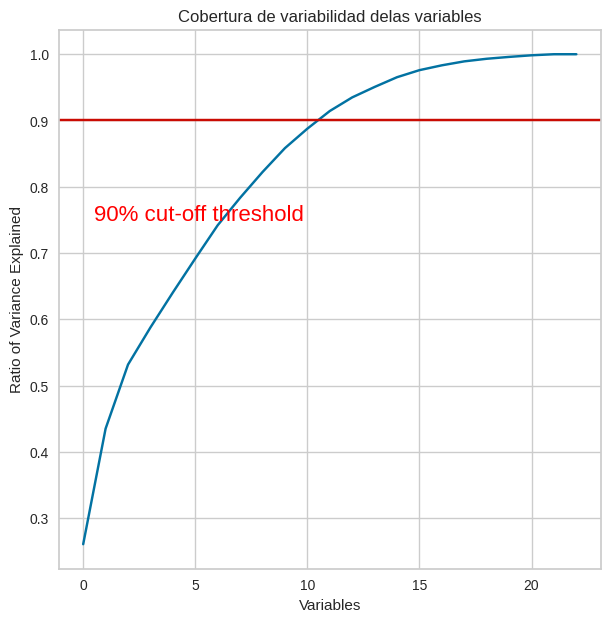

In [93]:
plt.rcParams['figure.figsize'] = 7, 7
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Variables')
plt.ylabel('Ratio of Variance Explained')
plt.title('Cobertura de variabilidad delas variables')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.75, '90% cut-off threshold', color = 'red', fontsize=16)
#ax.grid(axis='x')
plt.show()

Con las 12 primeras se llega al 90% de la de explicacion de variabilidad

In [94]:
pcaData.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.719146,-1.231622,0.930618,-0.113730,1.093443,-0.195168,0.501384,-0.613909,0.382544,0.390024,...,-0.152010,0.539654,-0.179457,0.056184,-0.124095,-0.078771,0.010149,-0.012887,-0.007292,2.020711e-18
1,-2.217542,0.115506,-0.409769,1.055254,-0.141914,0.718164,0.436794,0.239590,-0.371400,-0.189894,...,0.554258,0.345017,0.191826,-0.105438,-0.045349,-0.205929,0.014298,0.031899,-0.001135,9.661853e-17
2,1.821500,-1.130224,0.651028,-0.834094,0.063432,-0.830669,-0.084158,-0.035652,-0.242807,0.505518,...,-0.192522,0.666009,-0.207280,0.043479,-0.099534,0.063600,0.014496,-0.007970,-0.023250,1.021555e-19
3,1.021970,-0.387139,-1.589039,0.399581,-0.863917,-0.045564,-0.177762,0.152497,-0.601616,0.025002,...,0.037315,0.350405,-0.235687,-0.088316,-0.030620,-0.051561,0.021257,0.016452,-0.009464,-3.011127e-19
4,1.715470,-0.634820,0.636840,-0.557327,0.000973,-0.644820,-0.344006,-0.036339,-0.265620,0.535585,...,-0.087763,0.577292,-0.120771,0.034446,-0.145032,0.219851,0.002740,-0.008709,-0.029193,3.716508e-19


In [95]:

pcaData.drop(columns = [13,14,15,16,17,18,19,20,21,22], inplace=True)
pcaData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.719146,-1.231622,0.930618,-0.113730,1.093443,-0.195168,0.501384,-0.613909,0.382544,0.390024,-0.048311,-0.107862,0.004438
1,-2.217542,0.115506,-0.409769,1.055254,-0.141914,0.718164,0.436794,0.239590,-0.371400,-0.189894,-0.385359,-0.393042,-0.368789
2,1.821500,-1.130224,0.651028,-0.834094,0.063432,-0.830669,-0.084158,-0.035652,-0.242807,0.505518,-0.031962,-0.350830,-0.359677
3,1.021970,-0.387139,-1.589039,0.399581,-0.863917,-0.045564,-0.177762,0.152497,-0.601616,0.025002,-0.554228,-0.397712,-0.212976
4,1.715470,-0.634820,0.636840,-0.557327,0.000973,-0.644820,-0.344006,-0.036339,-0.265620,0.535585,0.035435,-0.352897,-0.008347


In [96]:
X_train_encPCA=pcaData

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
model = RandomForestRegressor()
model.fit(X_train_encPCA, y_train)

RandomForestRegressor()

In [99]:
X_test1 = preprocessor.transform(X_test)

In [100]:
pcaDatatest = pd.DataFrame(pca.fit_transform(X_test1))

In [101]:
pcaDatatest.drop(columns = [13,14,15,16,17,18,19,20,21,22], inplace=True)
pcaDatatest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.513555,-0.651626,0.490715,-0.163307,0.780728,-0.218944,-0.176504,-0.024233,0.243349,-0.161544,-0.175344,0.120786,-0.866314
1,-1.134934,0.734644,-0.567854,-0.178737,-0.660844,-0.246787,0.206843,-0.268136,-0.099068,0.788678,-0.732046,0.124697,-0.065988
2,1.077660,0.771736,-1.257751,0.739751,-0.402655,0.461888,-0.559639,-0.069275,-0.214890,-0.458875,0.146735,0.406888,0.190326
3,-0.784364,0.369369,1.476690,-0.553129,0.658399,-0.355161,-0.317900,1.426171,-0.803833,0.273508,-0.501541,-0.143313,0.159063
4,1.491122,-1.062551,-0.098926,-0.327640,0.440304,-0.371174,-0.046594,0.128209,0.562863,-0.462505,-0.328884,0.027813,0.041026


In [102]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score



In [103]:
pred = model.predict(pcaDatatest)

In [104]:
#pred_tree = model_tree.predict(X_test1)

In [105]:
metrics_dict = {'MAE': [mean_absolute_error(y_test, pred)], 'MSE': [mean_squared_error(y_test, pred)],
              'R2': [r2_score(y_test, pred)], 'MAPE': [mean_absolute_percentage_error(y_test, pred)]}
pd.DataFrame.from_dict(metrics_dict, orient='index')

,0
MAE,154.651188
MSE,59858.360865
R2,0.826705
MAPE,0.594321


In [106]:
#metrics_dict = {'MAE': [mean_absolute_error(y_test, pred_tree)], 'MSE': [mean_squared_error(y_test, pred_tree)],
#              'R2': [r2_score(y_test, pred_tree)], 'MAPE': [mean_absolute_percentage_error(y_test, pred_tree)]}
#pd.DataFrame.from_dict(metrics_dict, orient='index')

In [107]:
r2 = r2_score(y_test, pred)
n = len(y_test)
p = X_test.shape[1]


print(1 - (1-r2)*(n-1)/(n-p-1))

0.8202421868024238


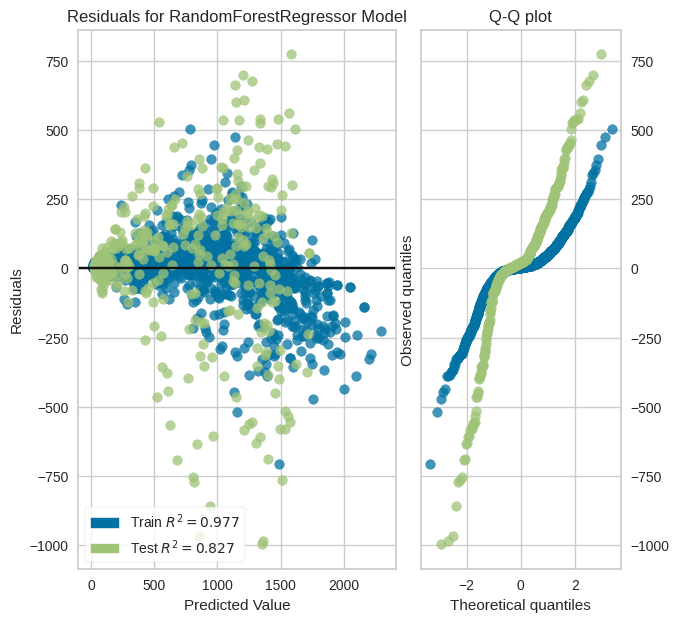

In [108]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

visualizer = ResidualsPlot(model,hist=False, qqplot=True)

visualizer.fit(X_train_encPCA, y_train)  # Fit the training data to the visualizer
visualizer.score(pcaDatatest, y_test)  # Evaluate the model on the test data
visualizer.show();

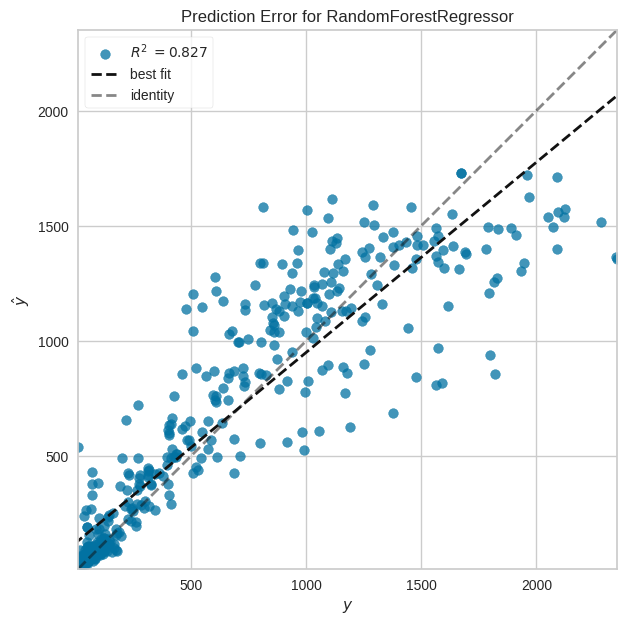

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [109]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

visualizer = PredictionError(model)

visualizer.fit(X_train_encPCA, y_train)  # Fit the training data to the visualizer
visualizer.score(pcaDatatest, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [110]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

In [111]:
#metodo para crossvalidation
CV_scores = cross_val_score(model, X_train_encPCA, y_train, cv=10)

In [112]:
CV_scores

array([0.86209955, 0.84873951, 0.79763374, 0.81482559, 0.85681027,
       0.79080259, 0.87667452, 0.87645464, 0.80849247, 0.86001502])

In [113]:
print("Cross validation score es  %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std()))

Cross validation score es  0.83925 ± 0.03


**0.83944 ± 0.03  es la prediccion del modelo RANDON FOREST segun Cross validation.**

In [114]:
#ejemplo para estratificado

kfold = StratifiedKFold(n_splits=10,shuffle=True)

model = RandomForestRegressor()
CV_scores = cross_val_score(model, X_train_encPCA, y_train, cv=kfold)

print("Cross validation score es  %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross validation score es  0.84010 ± 0.03


**Determinación de underfitting o overfitting**

In [115]:
!pip install colorama
from colorama import Fore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
def print_scores(model ,X_train_encPCA , y_train, predictions , cv_splites=10):
    
    print(Fore.BLUE , "El promedion de score en el train es  %.5f" % model.score(X_train_encPCA, y_train))

    #cross validation

    CV_scores = cross_val_score(model,X_train_encPCA, y_train, cv=cv_splites)
    
    print(Fore.BLACK ,"Los scores del cross validation son: \n",CV_scores)
    print(Fore.BLACK ,"El score minimo es %.3f" % min(CV_scores))
    print(Fore.BLACK ,"El maximo score es %.3f" % max(CV_scores))
    print(Fore.YELLOW ,"Cross validation score es  %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std()))
   #print(Fore.RED ,"El test score es  %.5f " % accuracy_score(y_test,predictions))

In [117]:
y_test.shape

(446,)

In [118]:
model = RandomForestRegressor()
model.fit(X_train_encPCA, y_train)

predictions = model.predict(pcaDatatest)
print_scores(model, X_train_encPCA, y_train, predictions)

 El promedion de score en el train es  0.97812
 Los scores del cross validation son: 
 [0.86842861 0.84833547 0.79778247 0.81165909 0.86521469 0.79025104
 0.87568282 0.87879178 0.81683975 0.85645273]
 El score minimo es 0.790
 El maximo score es 0.879
 Cross validation score es  0.84094 ± 0.03


**LeaveOneOut**

In [119]:
X_train_encPCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.719146,-1.231622,0.930618,-0.113730,1.093443,-0.195168,0.501384,-0.613909,0.382544,0.390024,-0.048311,-0.107862,0.004438
1,-2.217542,0.115506,-0.409769,1.055254,-0.141914,0.718164,0.436794,0.239590,-0.371400,-0.189894,-0.385359,-0.393042,-0.368789
2,1.821500,-1.130224,0.651028,-0.834094,0.063432,-0.830669,-0.084158,-0.035652,-0.242807,0.505518,-0.031962,-0.350830,-0.359677
3,1.021970,-0.387139,-1.589039,0.399581,-0.863917,-0.045564,-0.177762,0.152497,-0.601616,0.025002,-0.554228,-0.397712,-0.212976
4,1.715470,-0.634820,0.636840,-0.557327,0.000973,-0.644820,-0.344006,-0.036339,-0.265620,0.535585,0.035435,-0.352897,-0.008347


In [120]:
y_train.head()

507      137
1043    1123
205       53
916       46
2205      52
Name: Mnt_total, dtype: int64

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from numpy import mean
from numpy import std
from numpy import absolute


In [122]:
#creando el modelo
model_loo = RandomForestRegressor()
cv = LeaveOneOut()

#evaluando el modelo
resultado_loo = cross_val_score(model_loo, X_train_encPCA, y_train,  scoring='neg_mean_absolute_error',  n_jobs=-1)
score = resultado_loo.mean()
print("Error medio:", score)

Error medio: -141.29906423693072


El error absoluto medio entre la predicción del modelo y los datos reales observados es de 140

In [64]:
resultado_loo2 = cross_val_score(model_loo, X_train_encPCA, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores2 = resultado_loo2.mean()
print("Desviación estándar de los valores residuales:", scores2)

Desviación estándar de los valores residuales: -57580.5386171156


**K-Fold**

In [123]:
modelkfold = RandomForestRegressor()

In [124]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1  

In [125]:
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1782, Test set:446
Fold:2, Train set: 1782, Test set:446
Fold:3, Train set: 1782, Test set:446
Fold:4, Train set: 1783, Test set:445
Fold:5, Train set: 1783, Test set:445


In [126]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [127]:
score = cross_val_score(modelkfold, X_train_encPCA, y_train, cv= kf, scoring="neg_mean_squared_error")


In [128]:
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-62846.67365854 -64403.59071345 -58404.78572669 -58316.48379551
 -49913.43702107]
rmse= 242.44
